In [36]:
%load_ext autoreload
%autoreload 2
import json
from scipy import sparse
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import progress_bar
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading the datatset with Pandas DF

In [ ]:
dataset1 = pd.read_json("signalmedia-1m.jsonl", lines=True)

In [24]:
dataset

,content,id,media-type,published,source,title,all_text
0,VETERANS saluted Worcester's first ever breakf...,f7ca322d-c3e8-40d2-841f-9d7250ac72ca,News,2015-09-07T10:16:14Z,Redditch Advertiser,Worcester breakfast club for veterans gives hu...,Worcester breakfast club for veterans gives hu...
1,New Product Gives Marketers Access to Real Key...,609772bc-0672-4db5-8516-4c025cfd54ca,News,2015-09-17T15:00:00Z,Virtualization Conference & Expo,Jumpshot Gives Marketers Renewed Visibility In...,Jumpshot Gives Marketers Renewed Visibility In...
2,Home »\rStyle » The Return Of The Nike Air Max...,1aa9d1b0-e6ba-4a48-ad0c-66552d896aac,Blog,2015-09-22T22:54:37Z,Streets Connect,The Return Of The Nike Air Max Sensation Has 8...,The Return Of The Nike Air Max Sensation Has 8...
3,NYMag.com Daily Intelligencer Vulture The Cut ...,719699f9-47be-4bc7-969b-b53a881c95ae,Blog,2015-09-16T23:12:11Z,The Cut,This New Dating App Will Ruin Your Internet Game,This New Dating App Will Ruin Your Internet Ga...
4,"KUALA LUMPUR, Sept 15 (MySinchew) -- The Kuala...",a080f99a-07d9-47d1-8244-26a540017b7a,News,2015-09-15T10:17:53Z,My Sinchew,Pay up or face legal action: DBKL,Pay up or face legal action: DBKL \n KUALA LUM...
5,"Mumbai, Sep 11 : Following were the indicative...",3c5636e8-06b7-43fd-8a80-0e8535f45cb2,News,2015-09-11T06:09:32Z,Newshence.com,"Euro up; USD, Pound and Yen down","Euro up; USD, Pound and Yen down \n Mumbai, Se..."
6,Words kill or give life; they are usually eith...,ba44d0cd-bff2-4875-8036-86f37419b5e7,News,2015-09-28T23:21:00Z,Times of Swaziland,THE INFLUENCE OF OUR WORDS,THE INFLUENCE OF OUR WORDS \n Words kill or gi...
7,"Just in time for the holiday shopping seasons,...",402f6983-3300-4546-82c5-6f4eb08d0ba7,News,2015-09-10T03:25:04Z,South Coast Register,"Hands on with Apple's iPhone 6s, iPad Pro and ...","Hands on with Apple's iPhone 6s, iPad Pro and ..."
8,SOURCE Harwood Feffer LLP\n\nNEW YORK \n\nOn J...,286868ed-ab9a-4990-a4af-436df8c5bff2,News,2015-09-25T21:00:00Z,WAFB,Harwood Feffer LLP Announces Investigation of ...,Harwood Feffer LLP Announces Investigation of ...
9,Tony Abbott's last word \nWatch the last pres...,c5f8a528-cc0f-4f3e-aaef-b9e3b6b00325,News,2015-09-15T06:04:06Z,Brisbane Times,What will happen to Peta Credlin and Brian Lou...,What will happen to Peta Credlin and Brian Lou...


In [4]:
dataset["all_text"] = dataset["title"].map(str) + " \n " + dataset["content"].map(str)

In [ ]:
for i in range(20):
    print(dataset["content"].iloc[i])
    print("----------------------")

# Tokeninzing, computing IDF and TFIDF term-document matrix

In [6]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_vectorizer = TfidfVectorizer(min_df=2, norm=None, stop_words='english') 
t0 = time()
features_idf = tfidf_vectorizer.fit(dataset["content"])
print("FIT done in %0.3fs." % (time() - t0))

FIT done in 490.092s.


In [7]:
tfidf_matrix = tfidf_vectorizer.transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 1019.533s.


In [8]:
idf_vectorizer = TfidfVectorizer(min_df=2, binary=True, norm=None, stop_words='english')
t0 = time()
idf_matrix = idf_vectorizer.fit_transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 527.723s.


## Terms and IDF

In [9]:
inv_vocab = {v: k for k, v in features_idf.vocabulary_.items()}

## Documents with high IDF or TFIDF

### Look at top 10 IDF terms and their TFIDF  

## Position of High terms in Docs

In [10]:
# do some regression to find alpha for each (buckets with freqs?)

# as described here: https://www.nltk.org/_modules/nltk/tokenize.html
# the default analyzer used in scikit is called "word": 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

def find_positions_term(term, token_text):
    pos = [k for k,v in enumerate(token_text) if v==term]
    return pos

def find_positions_termlist(terms, token_text):
    term_set = set(terms)
    pos = [k for k,v in enumerate(token_text) if v in term_set]
    return pos

In [11]:
analyzer = tfidf_vectorizer.build_analyzer()

#### Top 10 TFIDF terms per document

### Average distribution for all docs

In [12]:
def getDistributionForRows(row_idxs, matrix, dataset, num_passage=10):
    cum_sum = np.zeros(num_passage)
    for i in progress_bar.iter_progress(row_idxs):

        row = matrix.getrow(i) # this is a 1 x 659255 csr matrix
        top10Terms_idx = row.data.argsort()[::-1][:10]

        # find the positions of high idf/tfidf terms in the text
        top_10_terms = [inv_vocab[term_id] for term_id in row.indices[top10Terms_idx]]

        # inside the document
        all_text = dataset["content"].iloc[i]
        token_text = analyzer(all_text.lower())

        all_pos = find_positions_termlist(top_10_terms[:10], token_text) # THIS IS THE DIFFERENCE with the other notebook
        all_pos.append(len(token_text))
        n,_ = np.histogram(all_pos, bins=num_passage, density=False, weights=np.ones(len(all_pos)) / len(all_pos))
        cum_sum += n

    return cum_sum/len(row_idxs) 

#### IDF

In [13]:
getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset)

# [ 0.15849338,  0.08654554,  0.08584007,  0.08343284,  0.08223365,
#         0.08589565,  0.08470705,  0.08382871,  0.08707116,  0.16195194]

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

array([ 0.15849338,  0.08654554,  0.08584007,  0.08343284,  0.08223365,
        0.08589565,  0.08470705,  0.08382871,  0.08707116,  0.16195194])

In [14]:
for num_passage in [2,4,8,16]:
    distrib = getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset, num_passage)
    print("Num passage", num_passage)
    print(distrib)

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

Num passage 2
[ 0.49654548  0.50345452]


VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

Num passage 4
[ 0.28758976  0.20895572  0.21199177  0.29146275]


VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

Num passage 8
[ 0.18044142  0.10714835  0.10617002  0.10278569  0.10731395  0.10467781
  0.10762003  0.18384271]


VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

Num passage 16
[ 0.1250567   0.05538472  0.0544379   0.05271045  0.05400927  0.05216075
  0.05271154  0.05007415  0.05484871  0.05246525  0.05285598  0.05182183
  0.05380175  0.05381828  0.05552626  0.12831645]


#### TFIDF

In [15]:
getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset)

# [ 0.16176254  0.09472742  0.09135097  0.08879455  0.0870066   0.09013596
#  0.0879273   0.08500273  0.08299202  0.13029989]

VBox(children=(HTML(value='0 / 1000000 items . Rate ?/s . Remaining ?s . Elapsed 0.0s'), IntProgress(value=0, max=1000000)))

array([ 0.14250787,  0.0989011 ,  0.09575329,  0.09325474,  0.09129108,
        0.09466752,  0.09278141,  0.08985508,  0.08810683,  0.11288108])

In [ ]:
for num_passage in [2,4,8,16]:
    distrib = getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset, num_passage)
    print("Num passage", num_passage)
    print(distrib)

#### See the distribution of document lengths - histo with 20 bins? 

In [ ]:
doc_len = []

for i in progress_bar.iter_progress(range(idf_matrix.shape[0])):
    # inside the document
    all_text = dataset["content"].iloc[i]
    token_text = analyzer(all_text.lower())
    doc_len.append(len(token_text))

In [ ]:
np.histogram(doc_len, bins=10)  #, density=False, weights=np.ones(len(doc_len)) / len(doc_len))

In [ ]:
#### see the distribution of articles with length smaller than 1000
a_max1000 = [x for x in doc_len if x<=1000]
np.histogram(a_max1000, bins=10)

In [ ]:
### Create a dict from doc length interval and index list
from collections import defaultdict

doc_len_index = defaultdict(list)
for idx, length in enumerate(doc_len):
    doc_len_index[int(length/100)].append(idx)

In [ ]:
doc_len_index.keys()

In [ ]:
result_dict=dict()
for len_interval, idx_list in doc_len_index.items():
    v = getDistributionForRows(idx_list, tfidf_matrix, dataset)
    result_dict[len_interval]=v

In [ ]:
for k,v in result_dict.items():
    interval = "Interval: [" + str(k*100) + "-" + str(k*100+100) +")"
    print(interval, "| #", len(doc_len_index[k]), "documents")
    print(v)
    print()

# PLOT distrib

In [18]:
#plot them
ind = [x+0.5 for x in range(0,11)]
vals = [x+1 for x in range(0,10)]

In [19]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'grayscale', 'classic', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn-poster', 'seaborn-deep', 'seaborn-white', 'seaborn-pastel', 'seaborn-paper', '_classic_test', 'seaborn-dark', 'Solarize_Light2', 'seaborn-talk', 'seaborn-whitegrid', 'fast', 'dark_background', 'seaborn-muted', 'seaborn', 'fivethirtyeight', 'ggplot', 'seaborn-bright']


In [44]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def plotSteps(style):
    plt.style.use(style)
    histogram=plt.figure()
    
    # we add the first element twice to make x,y match
    top10_idf = [0.15849338,0.15849338,  0.08654554,  0.08584007,  0.08343284,  0.08223365, 0.08589565,  0.08470705,  0.08382871,  0.08707116,  0.16195194]
    top10_tfidf = [ 0.14250787, 0.14250787,  0.0989011 ,  0.09575329,  0.09325474,  0.09129108, 0.09466752,  0.09278141,  0.08985508,  0.08810683,  0.11288108]

    top5_idf = [0.21536741,0.21536741,0.07443482,0.0717614,0.06874424,0.06757452,0.0709799,0.06936171,0.06951786,0.07363883,0.21861932]
    top5_tfidf = [0.16176254, 0.16176254,0.09472742,0.09135097,0.08879455,0.0870066,0.09013596,0.0879273,0.08500273,0.08299202,0.13029989]

    plt.step(range(0,11),top10_idf, label="Top 10 IDF", linewidth=2.0)
    plt.step(range(0,11),top10_tfidf, label="Top 10 TFIDF", linewidth=2.0)
    plt.step(range(0,11),top5_idf, label="Top 5 IDF", linewidth=2.0)
    plt.step(range(0,11),top5_tfidf, label="Top 5 TFIDF", linewidth=2.0)
    plt.xticks(ind, vals)
#     plt.title("Distribution of important terms in the documents")
    plt.xlabel("Passage ID")
    plt.ylabel("Probability")
    plt.legend(loc="best")
    plt.savefig("probabDistribSignal.pdf", bbox_inches='tight')
    #plt.grid(False)
    plt.show()

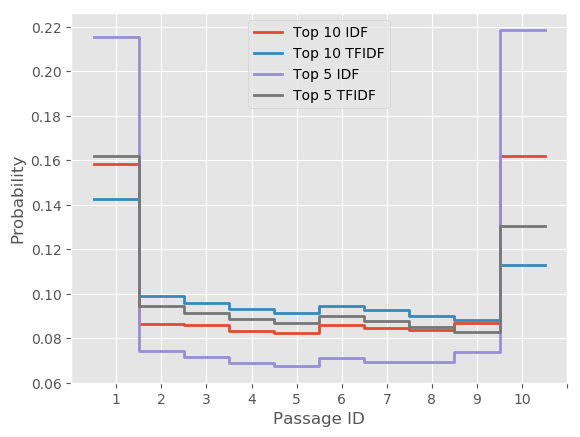

In [45]:
for style in ["ggplot"]:
    plotSteps(style)


# Distribution, mean, variance for title and content

In [34]:
# load stopwords
stopwords = []
with open("/home/muntean//terrier-core-4.2/share/stopword-list.txt") as f:
    for line in f:
        stopwords.append(line.replace("\n",""))
# print(stopwords)

In [25]:
doc_len = []

for i in range(dataset.shape[0]):
    # inside the document
    all_text = dataset["content"].iloc[i]
#     token_text = analyzer(all_text.lower())
    token_text = [x for x in all_text.lower().split() if x not in stopwords]
    token_text_split = all_text.split()
    doc_len.append(((len(token_text)), len(token_text_split)))

In [46]:
from scipy import stats

x = [x for x,y in doc_len]
y = [y for x,y in doc_len]
print(stats.describe(x))
print(np.std(x))

print(stats.describe(y))

DescribeResult(nobs=1000000, minmax=(0, 11228), mean=224.21557300000001, variance=67314.537393819046, skewness=7.750407097188341, kurtosis=141.034666048289)
259.450322951
DescribeResult(nobs=1000000, minmax=(1, 12450), mean=393.08864899999998, variance=202733.25051560518, skewness=6.644197093122161, kurtosis=97.52663166845048)


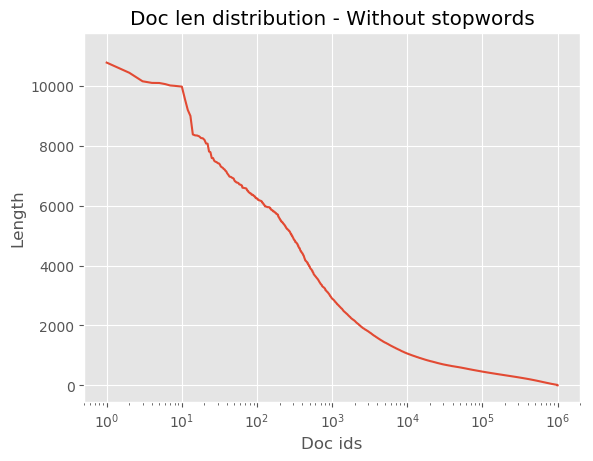

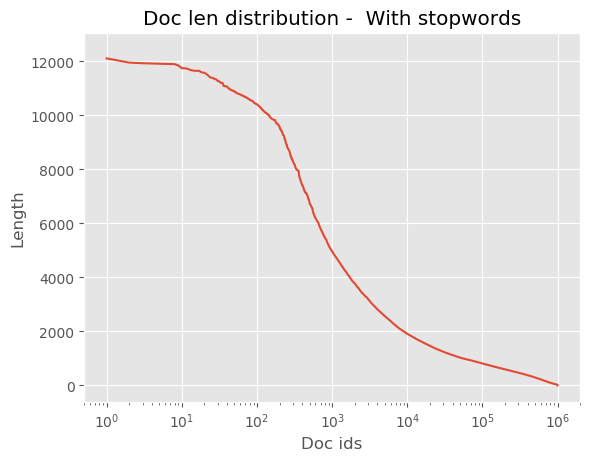

In [27]:
plt.semilogx(sorted(x, reverse=True))
plt.title("Doc len distribution - Without stopwords")
plt.xlabel("Doc ids")
plt.ylabel("Length")
plt.show()

plt.semilogx(sorted(y, reverse=True))
plt.title("Doc len distribution -  With stopwords")
plt.xlabel("Doc ids")
plt.ylabel("Length")
plt.show()

In [28]:
newTitle = dataset.title.str.replace('[^a-zA-Z ]', '')

In [29]:
title_len = []
for i in range(newTitle.shape[0]):
    # inside the document
    all_text = newTitle.iloc[i]
#     token_text = analyzer(all_text.lower()) # analyzer removes all token with df = 1
    token_text = [x for x in all_text.lower().split() if x not in stopwords]
    token_text_split = all_text.split()
    title_len.append((len(token_text), len(token_text_split)))

In [47]:
x = [x for x,y in title_len]
y = [y for x,y in title_len]
print(stats.describe(x))

print(np.std(x))

print(stats.describe(y))

DescribeResult(nobs=1000000, minmax=(0, 38), mean=6.6446880000000004, variance=8.7428341254901252, skewness=1.331263579921561, kurtosis=5.18234740730038)
2.95682691118
DescribeResult(nobs=1000000, minmax=(0, 56), mean=8.9840689999999999, variance=17.200636403875411, skewness=1.717428642102026, kurtosis=8.312279770736039)


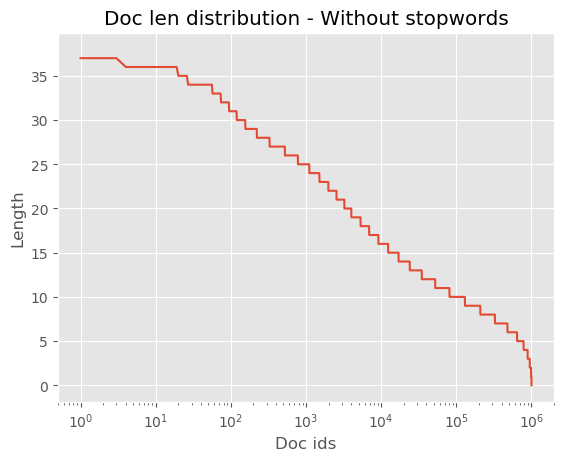

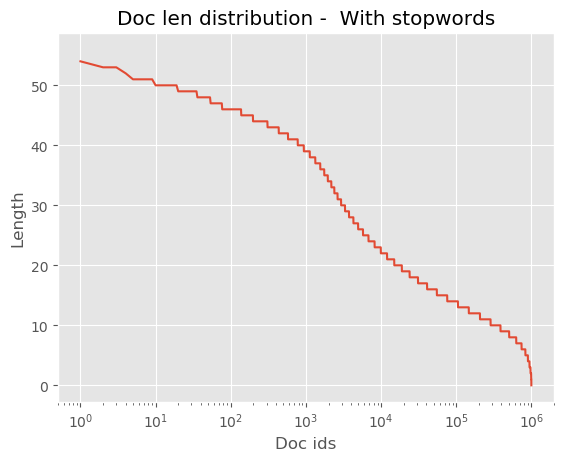

In [31]:
plt.semilogx(sorted(x, reverse=True))
plt.title("Doc len distribution - Without stopwords")
plt.xlabel("Doc ids")
plt.ylabel("Length")
plt.show()

plt.semilogx(sorted(y, reverse=True))
plt.title("Doc len distribution -  With stopwords")
plt.xlabel("Doc ids")
plt.ylabel("Length")
plt.show()

# 7. Computing hardness

In [38]:
# signal_query_hardness_dict = dict()
# for i in range(dataset.shape[0]):
#     # inside the document
#     content = dataset["content"].iloc[i]
#     token_content = [x for x in content.lower().split() if x not in stopwords]
#     # title
#     title = newTitle.iloc[i]
#     token_title = [x for x in title.lower().split() if x not in stopwords]
    
#     signal_query_hardness_dict[i] = float(len(token_title)) / len(token_content)

In [39]:
signal_query_hardness_dict[3]

0.006560449859418931

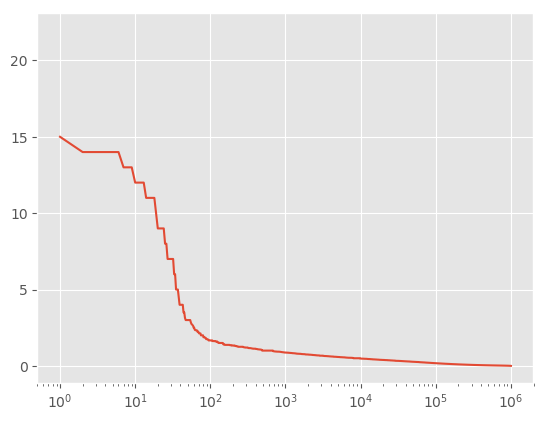

DescribeResult(nobs=1000000, minmax=(0.0, 22.0), mean=0.072820824720862501, variance=0.014450736611689231, skewness=34.57848499930494, kurtosis=3722.811681257355)


In [40]:
plt.semilogx(sorted(list(signal_query_hardness_dict.values()), reverse=True))
plt.show()

print(stats.describe(list(signal_query_hardness_dict.values())))

In [43]:
%store signal_query_hardness_dict

Stored 'signal_query_hardness_dict' (dict)
